#16년, 17년 각각 자료

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

In [2]:
df = pd.read_csv("../data/2016-2017gnorth.csv", thousands=',', encoding='euc-kr')
df1 = pd.read_csv("../data/2016-2017gnorthseek.csv", thousands=',', encoding='euc-kr')
df2 = pd.read_csv("../data/2016-2017ojeon.csv", thousands=',', encoding='euc-kr')
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa)
0,279,2016-01-01,-4.7,-7.9,-1.4,35.0,1024.9
1,279,2016-01-02,-2.5,-6.2,0.8,30.0,1017.9
2,279,2016-01-03,-2.1,-8.7,4.1,33.0,1013.5
3,279,2016-01-04,0.7,-5.1,9.3,42.0,1016.0
4,279,2016-01-05,2.1,-4.1,9.1,51.0,1019.9


In [3]:
df = pd.merge(df, df1, on="일시")
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa),시도지역코드,발생건수(건)
0,279,2016-01-01,-4.7,-7.9,-1.4,35.0,1024.9,경북,628
1,279,2016-01-02,-2.5,-6.2,0.8,30.0,1017.9,경북,3365
2,279,2016-01-03,-2.1,-8.7,4.1,33.0,1013.5,경북,1899
3,279,2016-01-04,0.7,-5.1,9.3,42.0,1016.0,경북,260
4,279,2016-01-05,2.1,-4.1,9.1,51.0,1019.9,경북,3201


In [4]:
del df['시도지역코드']

In [5]:
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa),발생건수(건)
0,279,2016-01-01,-4.7,-7.9,-1.4,35.0,1024.9,628
1,279,2016-01-02,-2.5,-6.2,0.8,30.0,1017.9,3365
2,279,2016-01-03,-2.1,-8.7,4.1,33.0,1013.5,1899
3,279,2016-01-04,0.7,-5.1,9.3,42.0,1016.0,260
4,279,2016-01-05,2.1,-4.1,9.1,51.0,1019.9,3201


In [6]:
df = pd.merge(df, df2, on="일시")
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa),발생건수(건),평균 오존전량(DU)
0,279,2016-01-01,-4.7,-7.9,-1.4,35.0,1024.9,628,354.9
1,279,2016-01-02,-2.5,-6.2,0.8,30.0,1017.9,3365,365.5
2,279,2016-01-03,-2.1,-8.7,4.1,33.0,1013.5,1899,373.2
3,279,2016-01-04,0.7,-5.1,9.3,42.0,1016.0,260,339.8
4,279,2016-01-05,2.1,-4.1,9.1,51.0,1019.9,3201,269.9


In [7]:
df['최고기온(°C)'] = df['최고기온(°C)'] - df['최저기온(°C)'] 
df['지점']='경북'
df.rename(columns={ df.columns[0] : '지점',
                    df.columns[1] : '일시',
                    df.columns[2] : '평균기온',
                    df.columns[3] : '최저기온',
                    df.columns[4] : '일교차',
                    df.columns[5] : '최소상대습도',
                    df.columns[6] : '기압',
                    df.columns[7] : '환자수',
                    df.columns[8] : '오존량'},inplace=True)
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량
0,경북,2016-01-01,-4.7,-7.9,6.5,35.0,1024.9,628,354.9
1,경북,2016-01-02,-2.5,-6.2,7.0,30.0,1017.9,3365,365.5
2,경북,2016-01-03,-2.1,-8.7,12.8,33.0,1013.5,1899,373.2
3,경북,2016-01-04,0.7,-5.1,14.4,42.0,1016.0,260,339.8
4,경북,2016-01-05,2.1,-4.1,13.2,51.0,1019.9,3201,269.9


In [8]:
df['최저기온위험지수'] = 'NaN'
df['일교차위험지수'] = 'NaN'
df['습도위험지수'] = 'NaN'
df['오존위험지수'] = 'NaN'
df['기압위험지수'] = 'NaN'
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수
0,경북,2016-01-01,-4.7,-7.9,6.5,35.0,1024.9,628,354.9,NaN,NaN,NaN,NaN,NaN
1,경북,2016-01-02,-2.5,-6.2,7.0,30.0,1017.9,3365,365.5,NaN,NaN,NaN,NaN,NaN
2,경북,2016-01-03,-2.1,-8.7,12.8,33.0,1013.5,1899,373.2,NaN,NaN,NaN,NaN,NaN
3,경북,2016-01-04,0.7,-5.1,14.4,42.0,1016.0,260,339.8,NaN,NaN,NaN,NaN,NaN
4,경북,2016-01-05,2.1,-4.1,13.2,51.0,1019.9,3201,269.9,NaN,NaN,NaN,NaN,NaN


In [9]:
#습도는 절대값으로 한다.
for i in df.index:
    if df.values[i,5] >62.5:
        df['습도위험지수'].values[i] = '1'
    elif 62.5<= df.values[i,5] <44.5:
        df['습도위험지수'].values[i] = '2'
    elif 44.5<= df.values[i,5] <30.3:
        df['습도위험지수'].values[i] = '3'
    else:
        df['습도위험지수'].values[i] = '4'
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수
0,경북,2016-01-01,-4.7,-7.9,6.5,35.0,1024.9,628,354.9,NaN,NaN,4,NaN,NaN
1,경북,2016-01-02,-2.5,-6.2,7.0,30.0,1017.9,3365,365.5,NaN,NaN,4,NaN,NaN
2,경북,2016-01-03,-2.1,-8.7,12.8,33.0,1013.5,1899,373.2,NaN,NaN,4,NaN,NaN
3,경북,2016-01-04,0.7,-5.1,14.4,42.0,1016.0,260,339.8,NaN,NaN,4,NaN,NaN
4,경북,2016-01-05,2.1,-4.1,13.2,51.0,1019.9,3201,269.9,NaN,NaN,4,NaN,NaN


In [10]:
for i in df.index:        
    if df.values[i,4] < 8.6 : 
        df['일교차위험지수'].values[i] = '1' 
    elif 8.6<= df.values[i,4] < 12.3: 
        df['일교차위험지수'].values[i] = '2'  
    elif 12.3<=df.values[i,4] < 15.8:  
        df['일교차위험지수'].values[i] = '3'  
    elif 15.8<= df.values[i,4] : 
        df['일교차위험지수'].values[i] = '4' 
            
    if df.values[i,3] <-7.7 or 30<=df.values[1,3]: 
        df['최저기온위험지수'].values[i] = '4' 
    elif -7.7<=df.values[i,3] <-0.5:
        df['최저기온위험지수'].values[i] = '3' 
    elif -0.5<=df.values[i,3] < 12.6:
        df['최저기온위험지수'].values[i] = '2'  
    elif 12.6<=df.values[i,3] <30:
        df['최저기온위험지수'].values[i] = '1'  

In [11]:
for i in df.index:        
    if df.values[i,6] < 1007.6 : 
        df['기압위험지수'].values[i] = '1' 
    elif 1007.6<= df.values[i,6] < 1016.2: 
        df['기압위험지수'].values[i] = '2'  
    elif 1016.2<=df.values[i,6] < 1022.1:  
        df['기압위험지수'].values[i] = '3'  
    elif 1022.1<= df.values[i,6] : 
        df['기압위험지수'].values[i] = '4' 

In [429]:
for i in df.index:
    if df.values[i,8] < 319.8:
        df['오존위험지수'].values[i] = '1'
    elif 319.8<=df.values[i,8] < 352.7:
        df['오존위험지수'].values[i] = '2'
    elif 352.7<=df.values[i,8] < 401.4:
        df['오존위험지수'].values[i] = '3'
    elif 401.4<= df.values[i,8]:
        df['오존위험지수'].values[i] = '4'  


In [13]:
df['최소상대습도'] = 100 - df['최소상대습도']
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수
0,경북,2016-01-01,-4.7,-7.9,6.5,65.0,1024.9,628,354.9,4,1,4,4,4
1,경북,2016-01-02,-2.5,-6.2,7.0,70.0,1017.9,3365,365.5,3,1,4,4,3
2,경북,2016-01-03,-2.1,-8.7,12.8,67.0,1013.5,1899,373.2,4,3,4,4,2
3,경북,2016-01-04,0.7,-5.1,14.4,58.0,1016.0,260,339.8,3,3,4,3,2
4,경북,2016-01-05,2.1,-4.1,13.2,49.0,1019.9,3201,269.9,3,3,4,1,3


# 일교차, 습도, 오존량, 기압, 최저

In [430]:
temr = df['일교차'].corr(df['환자수'])
hum = df['최소상대습도'].corr(df['환자수'])
oj = df['오존량'].corr(df['환자수'])
atm = df['기압'].corr(df['환자수'])
mtem = -df['최저기온'].corr(df['환자수'])
al = temr+hum+oj+mtem+atm

temr,hum,oj,mtem,atm

(0.03910330657760284,
 0.10844323015660828,
 0.16337018014287327,
 0.35029516031662483,
 0.3045863894248687)

In [431]:
temr = temr/al
hum = hum/al
oj = oj/al
atm = atm/al
mtem = mtem/al

temr, hum, oj, atm, mtem

(0.04048806870870672,
 0.11228352121223645,
 0.16915559469252284,
 0.31537268180370304,
 0.362700133582831)

In [432]:
df['ALI'] = float('NaN')
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자,all오존
0,경북,2016-01-01,-4.7,-7.9,6.5,65.0,1024.9,628,354.9,4,1,4,3,4,NaN,0.628,238176.7
1,경북,2016-01-02,-2.5,-6.2,7.0,70.0,1017.9,3365,365.5,3,1,4,3,3,NaN,3.365,238176.7
2,경북,2016-01-03,-2.1,-8.7,12.8,67.0,1013.5,1899,373.2,4,3,4,3,2,NaN,1.899,238176.7
3,경북,2016-01-04,0.7,-5.1,14.4,58.0,1016.0,260,339.8,3,3,4,2,2,NaN,0.260,238176.7
4,경북,2016-01-05,2.1,-4.1,13.2,49.0,1019.9,3201,269.9,3,3,4,1,3,NaN,3.201,238176.7


In [433]:
#temr, hum, oj, atm, mtem
#습도 최저 일교차 오존
for i in df.index:
    df['ALI'].values[i] = mtem*float(df.values[i,9])+temr*float(df.values[i,10])+hum*float(df.values[i,11])+oj*float(df.values[i,12])+ atm*float(df.values[i,13])

df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자,all오존
0,경북,2016-01-01,-4.7,-7.9,6.5,65.0,1024.9,628,354.9,4,1,4,3,4,3.709380,0.628,238176.7
1,경북,2016-01-02,-2.5,-6.2,7.0,70.0,1017.9,3365,365.5,3,1,4,3,3,3.031307,3.365,238176.7
2,경북,2016-01-03,-2.1,-8.7,12.8,67.0,1013.5,1899,373.2,4,3,4,3,2,3.159611,1.899,238176.7
3,경북,2016-01-04,0.7,-5.1,14.4,58.0,1016.0,260,339.8,3,3,4,2,2,2.627755,0.260,238176.7
4,경북,2016-01-05,2.1,-4.1,13.2,49.0,1019.9,3201,269.9,3,3,4,1,3,2.773972,3.201,238176.7


In [434]:
df.to_csv("../data/경북2.csv", encoding='utf-8', sep=',') 

In [435]:
la = pd.read_csv("../data/2016-2017gnorthlast.csv", thousands=',', encoding='euc-kr') 
la.head() 

,지점,일시
0,세종,2016-01-01
1,세종,2016-01-02
2,세종,2016-01-03
3,세종,2016-01-04
4,세종,2016-01-05


In [436]:
la['ALI지수값'] = float('NaN')

In [437]:
for i in df.index: 
    if float(df.values[i,14]) >= 3.0525: 
        la['ALI지수값'].values[i] = '4' 
    elif 2.6452<=float(df.values[i,14]) < 3.0525: 
        la['ALI지수값'].values[i] = '3' 
    elif 1.5354<=float(df.values[i,14]) <2.6452: 
        la['ALI지수값'].values[i] = '2' 
    elif 1<= float(df.values[i,14])<1.5354: 
        la['ALI지수값'].values[i] = '1' 
    
la.head()

,지점,일시,ALI지수값
0,세종,2016-01-01,4.0
1,세종,2016-01-02,3.0
2,세종,2016-01-03,4.0
3,세종,2016-01-04,2.0
4,세종,2016-01-05,3.0


In [438]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.2972844235582969

In [294]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.2972844235582969

In [23]:
la.to_csv("../data/경북1.csv", encoding='utf-8', sep=',') 

In [230]:
df['환자'] = df['환자수']/1000

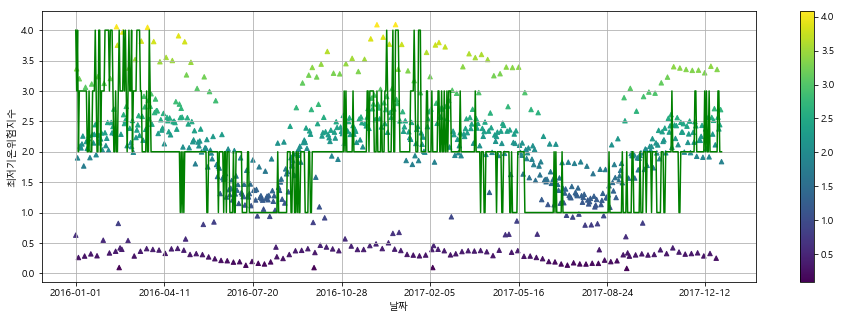

In [231]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALI지수값'], color = 'green') 
plt.scatter(df['일시'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.colorbar() 
plt.grid() 
plt.show()

# 습도, 최저기온, 일교차, 기압

In [26]:
la2 = pd.read_csv("../data/2016-2017gnorthlast.csv", thousands=',', encoding='euc-kr') 
la2['ALI지수값'] = 'NaN'

In [193]:
temr = df['일교차'].corr(df['환자수'])
hum = df['최소상대습도'].corr(df['환자수']) 
atm = df['기압'].corr(df['환자수'])
mtem = -df['최저기온'].corr(df['환자수'])
al = temr+hum+mtem+atm
temr,hum,mtem,atm

(0.03910330657760284,
 0.10844323015660828,
 0.35029516031662483,
 0.3045863894248687)

In [194]:
temr = temr/al
hum = hum/al 
atm = atm/al
mtem = mtem/al

temr, hum, atm, mtem

(0.04873122867538957,
 0.13514386146787954,
 0.3795809176653125,
 0.43654399219141843)

In [195]:
#temr, hum, oj, atm, mtem
#습도 최저 일교차 오존
for i in df.index:
    df['ALI'].values[i] = mtem*float(df.values[i,9])+temr*float(df.values[i,10])+hum*float(df.values[i,11])+atm*float(df.values[i,13])

df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자,all오존
0,경북,2016-01-01,-4.7,-7.9,6.5,65.0,1024.9,628,354.9,4,1,4,3,4,3.853806,0.628,238176.7
1,경북,2016-01-02,-2.5,-6.2,7.0,70.0,1017.9,3365,365.5,3,1,4,3,3,3.037681,3.365,238176.7
2,경북,2016-01-03,-2.1,-8.7,12.8,67.0,1013.5,1899,373.2,4,3,4,3,2,3.192107,1.899,238176.7
3,경북,2016-01-04,0.7,-5.1,14.4,58.0,1016.0,260,339.8,3,3,4,2,2,2.755563,0.260,238176.7
4,경북,2016-01-05,2.1,-4.1,13.2,49.0,1019.9,3201,269.9,3,3,4,1,3,3.135144,3.201,238176.7


In [30]:
df.to_csv("../data/경북5.csv", encoding='utf-8', sep=',') 

In [196]:
for i in df.index:        
    if float(df.values[i,14]) >= 3.0525:
        la['ALI지수값'].values[i] = '4'
    elif 2.6452<=float(df.values[i,14]) < 3.0525:
        la['ALI지수값'].values[i] = '3'
    elif 1.5354<=float(df.values[i,14]) <2.6452:
        la['ALI지수값'].values[i] = '2'
    elif 1<= float(df.values[i,14])<1.5354:
        la['ALI지수값'].values[i] = '1' 
        
la.head()

,지점,일시,ALI지수값
0,세종,2016-01-01,4.0
1,세종,2016-01-02,3.0
2,세종,2016-01-03,4.0
3,세종,2016-01-04,3.0
4,세종,2016-01-05,4.0


In [197]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.29685786306034523

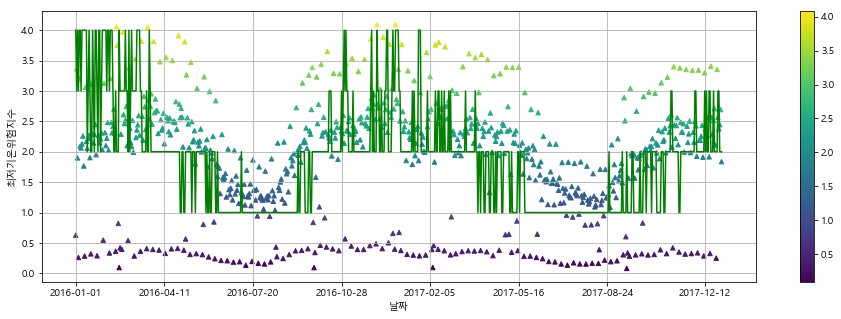

In [33]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALI지수값'], color = 'green') 
plt.scatter(df['일시'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.colorbar() 
plt.grid() 
plt.show()

# 일교차, 오존, 기압, 최저기온

In [182]:
temr = df['일교차'].corr(df['환자수']) 
oj = df['오존량'].corr(df['환자수']) 
atm = df['기압'].corr(df['환자수']) 
mtem = -df['최저기온'].corr(df['환자수']) 
al = temr+oj+mtem+atm
temr,oj,mtem,atm

(0.03910330657760284,
 0.16337018014287327,
 0.35029516031662483,
 0.3045863894248687)

In [183]:
temr = temr/al 
oj = oj/al 
atm = atm/al 
mtem = mtem/al 
temr,oj,mtem,atm 

(0.045609234114923604,
 0.19055137392911323,
 0.40857654696026635,
 0.3552628449956968)

In [184]:
#temr, hum, oj, atm, mtem
#습도 최저 일교차 오존
#최저, 일교, 습도, 오존, 기압
for i in df.index:
    df['ALI'].values[i] = mtem*float(df.values[i,9])+temr*float(df.values[i,10])+oj*float(df.values[i,12])+atm*float(df.values[i,13])

df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자,all오존
0,경북,2016-01-01,-4.7,-7.9,6.5,65.0,1024.9,628,354.9,4,1,4,3,4,3.672621,0.628,238176.7
1,경북,2016-01-02,-2.5,-6.2,7.0,70.0,1017.9,3365,365.5,3,1,4,3,3,2.908782,3.365,238176.7
2,경북,2016-01-03,-2.1,-8.7,12.8,67.0,1013.5,1899,373.2,4,3,4,3,2,3.053314,1.899,238176.7
3,경북,2016-01-04,0.7,-5.1,14.4,58.0,1016.0,260,339.8,3,3,4,2,2,2.454186,0.260,238176.7
4,경북,2016-01-05,2.1,-4.1,13.2,49.0,1019.9,3201,269.9,3,3,4,1,3,2.618897,3.201,238176.7


In [185]:
for i in df.index:        
    if float(df.values[i,14]) >= 3.0525:
        la['ALI지수값'].values[i] = '4'
    elif 2.6452<=float(df.values[i,14]) < 3.0525:
        la['ALI지수값'].values[i] = '3'
    elif 1.5354<=float(df.values[i,14]) <2.6452:
        la['ALI지수값'].values[i] = '2'
    elif 1<= float(df.values[i,14])<1.5354:
        la['ALI지수값'].values[i] = '1' 
        
la.head()

,지점,일시,ALI지수값
0,세종,2016-01-01,4.0
1,세종,2016-01-02,3.0
2,세종,2016-01-03,4.0
3,세종,2016-01-04,2.0
4,세종,2016-01-05,2.0


In [186]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.3111989951969534

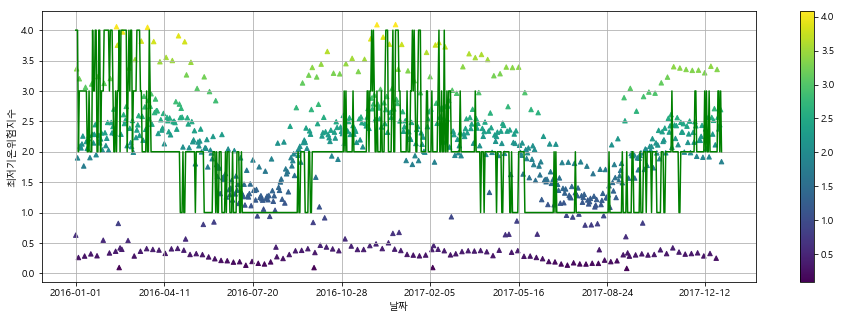

In [192]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALI지수값'], color = 'green') 
plt.scatter(df['일시'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.colorbar() 
plt.grid() 
plt.show()

# -----------------------

# 습도, 오존량, 기압, 최저기온

In [343]:
hum = df['최소상대습도'].corr(df['환자수'])
oj = df['오존량'].corr(df['환자수'])
atm = df['기압'].corr(df['환자수'])
mtem = -df['최저기온'].corr(df['환자수'])
al = hum+oj+mtem+atm 
hum, oj, atm, mtem

(0.10844323015660828,
 0.16337018014287327,
 0.3045863894248687,
 0.35029516031662483)

In [344]:
hum = hum/al
oj = oj/al
atm = atm/al
mtem = mtem/al
hum,oj,atm,mtem

(0.11702149556507063,
 0.17629337288685548,
 0.32868031289541166,
 0.37800481865266217)

In [345]:
#최저, 일교, 습도, 오존, 기압
for i in df.index:
    df['ALI'].values[i] = mtem*float(df.values[i,9])+hum*float(df.values[i,11])+oj*float(df.values[i,12])+atm*float(df.values[i,13])

df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자,all오존
0,경북,2016-01-01,-4.7,-7.9,6.5,65.0,1024.9,628,354.9,4,1,4,3,4,3.823707,0.628,238176.7
1,경북,2016-01-02,-2.5,-6.2,7.0,70.0,1017.9,3365,365.5,3,1,4,3,3,3.117021,3.365,238176.7
2,경북,2016-01-03,-2.1,-8.7,12.8,67.0,1013.5,1899,373.2,4,3,4,3,2,3.166346,1.899,238176.7
3,경북,2016-01-04,0.7,-5.1,14.4,58.0,1016.0,260,339.8,3,3,4,2,2,2.612048,0.260,238176.7
4,경북,2016-01-05,2.1,-4.1,13.2,49.0,1019.9,3201,269.9,3,3,4,1,3,2.764435,3.201,238176.7


In [346]:
for i in df.index:        
    if float(df.values[i,14]) >= 3.0525:
        la['ALI지수값'].values[i] = '4'
    elif 2.6452<=float(df.values[i,14]) < 3.0525:
        la['ALI지수값'].values[i] = '3'
    elif 1.5354<=float(df.values[i,14]) <2.6452:
        la['ALI지수값'].values[i] = '2'
    elif 1<= float(df.values[i,14])<1.5354:
        la['ALI지수값'].values[i] = '1' 
        
la.head()

,지점,일시,ALI지수값
0,세종,2016-01-01,4.0
1,세종,2016-01-02,4.0
2,세종,2016-01-03,4.0
3,세종,2016-01-04,2.0
4,세종,2016-01-05,3.0


In [347]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.30055724947746537

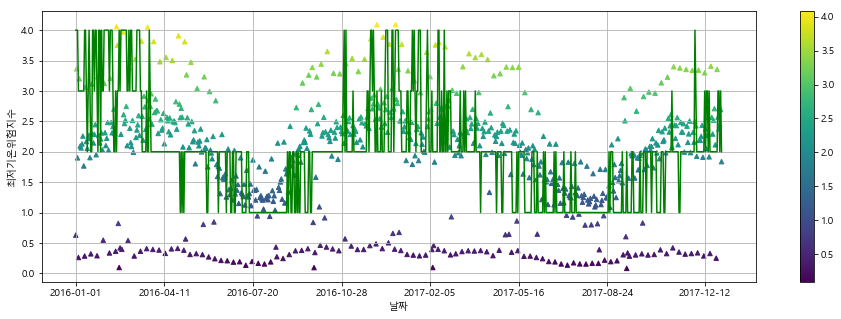

In [44]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALI지수값'], color = 'green') 
plt.scatter(df['일시'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.colorbar() 
plt.grid() 
plt.show()

In [86]:
df['all오존'] = df['오존량'].sum()

In [87]:
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자,all오존
0,경북,2016-01-01,-4.7,-7.9,6.5,65.0,1024.9,628,354.9,4,1,4,4,4,3.878536,0.628,238176.7
1,경북,2016-01-02,-2.5,-6.2,7.0,70.0,1017.9,3365,365.5,3,1,4,4,3,3.200463,3.365,238176.7
2,경북,2016-01-03,-2.1,-8.7,12.8,67.0,1013.5,1899,373.2,4,3,4,4,2,3.328767,1.899,238176.7
3,경북,2016-01-04,0.7,-5.1,14.4,58.0,1016.0,260,339.8,3,3,4,3,2,2.796911,0.260,238176.7
4,경북,2016-01-05,2.1,-4.1,13.2,49.0,1019.9,3201,269.9,3,3,4,1,3,2.773972,3.201,238176.7
